## **Import Library**

Code Import yang dilakukan :
1. untuk operasi file dan folder, serta akses dataset dari KaggleHub.
2. untuk membuat UI interaktif di notebook.
3. menyembunyikan peringatan yang tidak penting (misalnya FutureWarning).
4. Untuk manipulasi data (numpy, pandas) dan visualisasi (matplotlib, seaborn).
5. Untuk mengubah teks menjadi angka (TF-IDF) dan menghitung kesamaan antar teks (cosine similarity), biasanya dipakai untuk sistem rekomendasi berbasis konten.
6. Untuk membangun dan melatih model deep learning menggunakan TensorFlow dan Keras.

In [1]:
import os
import glob
import kagglehub
import ipywidgets as widgets
from IPython.display import display
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2025-04-24 01:17:52.838127: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745428672.860659  109668 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745428672.866694  109668 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745428672.886347  109668 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745428672.886387  109668 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745428672.886389  109668 computation_placer.cc:177] computation placer alr

## **Data Loading**

In [2]:
# Dataset info
dataset_owner = "imtkaggleteam"
dataset_name = "book-recommendation-good-book-api"
dataset_version = "2"  

# Expected path
expected_path = os.path.expanduser(
    f"~/.cache/kagglehub/datasets/{dataset_owner}/{dataset_name}/versions/{dataset_version}"
)

# Check if dataset already exists
if os.path.exists(expected_path):
    print(f"Dataset already exists at path: {expected_path}")
else:
    print("Dataset not found locally. Downloading...")
    path = kagglehub.dataset_download(f"{dataset_owner}/{dataset_name}")
    print(f"Path to dataset files: {path}")

Dataset already exists at path: /home/noir/.cache/kagglehub/datasets/imtkaggleteam/book-recommendation-good-book-api/versions/2


Pada tahapan diatas mengecek dan memastikan dataset book-recommendation-good-book-api versi 2 tersedia secara lokal, dan akan mengunduhnya dari KaggleHub jika belum tersedia.

In [3]:
# Path hasil download
path = kagglehub.dataset_download(f"{dataset_owner}/{dataset_name}")

# Cari semua file CSV dalam folder tersebut
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Tampilkan path lengkap masing-masing file
print("CSV files in dataset:")
for csv_file in csv_files:
    print(csv_file)

CSV files in dataset:
/home/noir/.cache/kagglehub/datasets/imtkaggleteam/book-recommendation-good-book-api/versions/2/books.csv


Kode ini akan mengunduh dataset dari KaggleHub, lalu menampilkan semua file CSV yang terdapat di dalam folder dataset tersebut beserta path-nya.

## **Data Understanding**

In [4]:
# Finding file csv in directory
csv_files = [f for f in os.listdir(expected_path) if f.endswith(".csv")]
csv_path = os.path.join(expected_path, csv_files[0])

dataset = pd.read_csv(csv_path, on_bad_lines='skip', quoting=3)
dataset.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


Kode ini berfungsi untuk membaca file CSV dari direktori dataset dan menampilkan bagian awal isi datanya untuk keperluan eksplorasi awal.

In [5]:
dataset.shape

(11123, 12)

kode diatas untuk melihat jumlah baris dan kolom dari dataset, 
- jumlah baris : 11123
- jumlah kolom : 12

In [6]:
dataset.columns = dataset.columns.str.strip()

Kode ini digunakan untuk menghapus spasi di awal dan akhir nama kolom dalam DataFrame dataset.

✅ Tujuan:
- Menghindari error saat mengakses kolom (misalnya ' Book-Title' menjadi 'Book-Title').
- Membersihkan dan menstandarkan nama kolom agar lebih rapi dan konsisten.

## **Univariate Exploratory Data Analysis**

**Statistics from dataset**

In [7]:
print("Statistics Results")
display(dataset.describe().T)

print("Statistics of all columns")
display(dataset.describe(include='all').T)

Statistics Results


,count,mean,std,min,25%,50%,75%,max
bookID,11123.0,2.131086e+04,1.309473e+04,1.000000e+00,1.027750e+04,2.028700e+04,3.210450e+04,4.564100e+04
average_rating,11123.0,3.934075e+00,3.504853e-01,0.000000e+00,3.770000e+00,3.960000e+00,4.140000e+00,5.000000e+00
isbn13,11123.0,9.759880e+12,4.429758e+11,8.987060e+09,9.780345e+12,9.780582e+12,9.780872e+12,9.790008e+12
num_pages,11123.0,3.364056e+02,2.411526e+02,0.000000e+00,1.920000e+02,2.990000e+02,4.160000e+02,6.576000e+03
ratings_count,11123.0,1.794285e+04,1.124992e+05,0.000000e+00,1.040000e+02,7.450000e+02,5.000500e+03,4.597666e+06
text_reviews_count,11123.0,5.420481e+02,2.576620e+03,0.000000e+00,9.000000e+00,4.700000e+01,2.380000e+02,9.426500e+04


Statistics of all columns


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
bookID,11123.0,NaN,NaN,NaN,21310.856963,13094.727252,1.0,10277.5,20287.0,32104.5,45641.0
title,11123,10348,The Brothers Karamazov,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
authors,11123,6639,Stephen King,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
average_rating,11123.0,NaN,NaN,NaN,3.934075,0.350485,0.0,3.77,3.96,4.14,5.0
isbn,11123,11123,8497646983,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isbn13,11123.0,NaN,NaN,NaN,9759880247639.154297,442975846058.352783,8987059752.0,9780345453803.5,9780582461536.0,9780872208045.5,9790007672386.0
language_code,11123,27,eng,8908,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_pages,11123.0,NaN,NaN,NaN,336.405556,241.152626,0.0,192.0,299.0,416.0,6576.0
ratings_count,11123.0,NaN,NaN,NaN,17942.848063,112499.153471,0.0,104.0,745.0,5000.5,4597666.0
text_reviews_count,11123.0,NaN,NaN,NaN,542.048099,2576.619589,0.0,9.0,47.0,238.0,94265.0


Kode ini memberikan dua jenis statistik deskriptif dari dataset. Pertama, `dataset.describe().T` menghitung statistik dasar untuk kolom numerik, seperti jumlah, rata-rata, standar deviasi, dan nilai minimum/maksimum, serta kuartil untuk membantu memahami distribusi data numerik. Kedua, `dataset.describe(include='all').T` menyertakan statistik untuk kolom kategorikal, seperti jumlah nilai unik, nilai terbanyak, dan frekuensinya. Kedua jenis statistik ini memberikan gambaran umum yang komprehensif tentang karakteristik dataset, baik untuk kolom numerik maupun kategorikal, yang berguna untuk analisis dan pemrosesan data lebih lanjut.

**Exploratory Visualization Distribution Data**

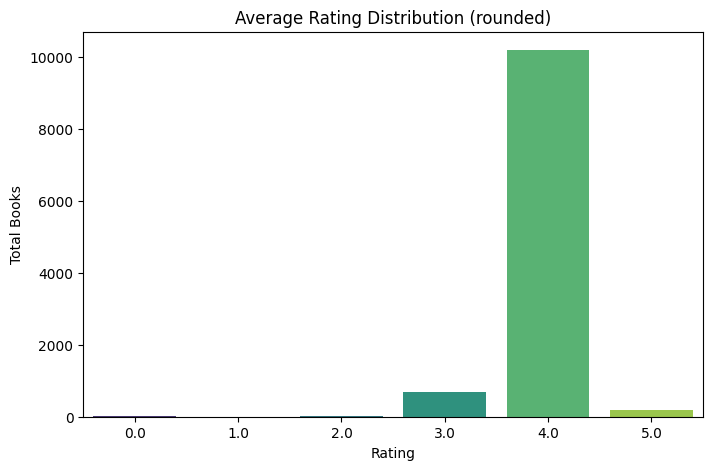

In [8]:
dataset['rounded_rating'] = dataset['average_rating'].round()

plt.figure(figsize=(8, 5))
sns.countplot(x='rounded_rating', data=dataset, palette='viridis')
plt.title("Average Rating Distribution (rounded)")
plt.xlabel("Rating")
plt.ylabel("Total Books")
plt.show()

🔍 Insight dari Grafik:
1. Rating 4 mendominasi:
    - Sebagian besar buku memiliki rating rata-rata yang dibulatkan ke angka 4.
    - Ini mengindikasikan bahwa mayoritas pengguna memberi ulasan positif terhadap buku-buku tersebut.
2. Rating 3 juga cukup banyak:
    - Terdapat sejumlah buku yang berada di kisaran rating cukup baik.
3. Rating 5 sangat sedikit:
    - Buku yang menerima rating sempurna (5) sangat jarang.
    - Mungkin karena ekspektasi tinggi pengguna, sehingga sulit memberikan nilai maksimal.
4. Rating 0–2 hampir tidak ada:
    - Sangat sedikit buku yang mendapat nilai buruk.
    - Bisa jadi buku-buku dengan rating sangat rendah tidak terlalu populer atau jarang diulas

📈 Kesimpulan:

Distribusi ini menunjukkan bahwa pengguna cenderung memberi rating tinggi, dengan nilai paling umum adalah 4. Ini dapat menunjukkan kecenderungan pengguna untuk menyukai sebagian besar buku, atau bahwa buku-buku dalam dataset ini memang berkualitas baik.

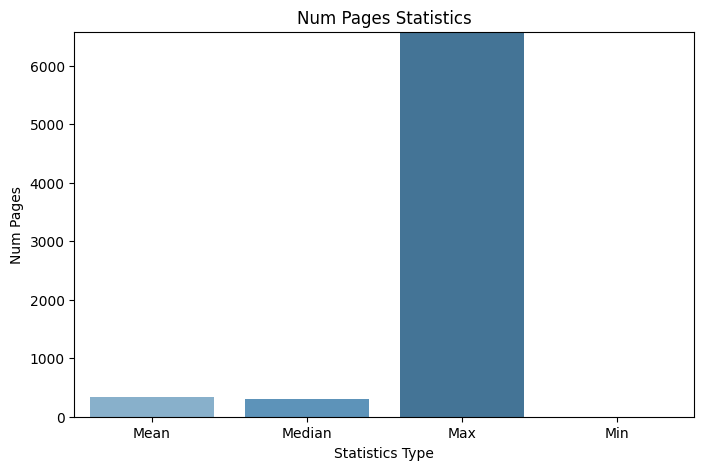

In [9]:
numPage_stats = {
    'Mean': dataset['num_pages'].mean(),
    'Median': dataset['num_pages'].median(),
    'Max': dataset['num_pages'].max(),
    'Min': dataset['num_pages'].min()
}

# dataframe for visualization
stats_df = pd.DataFrame(numPage_stats, index=['Age']).T.reset_index()
stats_df.columns = ['Statistik', 'Value']

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(data=stats_df, x='Statistik', y='Value', palette='Blues_d')
plt.title('Num Pages Statistics')
plt.ylabel('Num Pages')
plt.xlabel('Statistics Type')
plt.ylim(0, max(stats_df['Value']) + 5)
plt.show()

📍 Insight dari Barchart:
- Max (nilai maksimum) sangat tinggi:
- Terlihat paling mencolok. Ada buku dengan jumlah halaman lebih dari 6000, kemungkinan outlier atau buku dengan volume besar (misal ensiklopedia atau kompilasi).
- Mean dan Median relatif mirip:
- Rata-rata dan median berada di kisaran 300–400 halaman.
- Ini mencerminkan panjang umum buku yang ada di dataset.
- Min (nilai minimum) sangat rendah:
- Hampir menyentuh 0 halaman, bisa jadi buku sangat tipis, buku kosong, atau data error/missing.

📌 Kesimpulan:
- Data menunjukkan bahwa kebanyakan buku memiliki panjang halaman yang wajar (sekitar 300-an).
- Nilai maksimum sangat tinggi bisa mengindikasikan outlier yang perlu dipertimbangkan saat melakukan normalisasi data.

## **Data Preprocessing**

**Check CSV file**

In [10]:
with open(csv_path, 'r', encoding='utf-8') as file:
    for i, line in enumerate(file):
        fields = line.split(",")
        if len(fields) != 12:
            print(f"Line {i+1} has {len(fields)} fields: {line.strip()}")

Line 3350 has 13 fields: 12224,Streetcar Suburbs: The Process of Growth in Boston  1870-1900,Sam Bass Warner, Jr./Sam B. Warner,3.58,0674842111,9780674842113,en-US,236,61,6,4/20/2004,Harvard University Press
Line 4704 has 13 fields: 16914,The Tolkien Fan's Medieval Reader,David E. Smith (Turgon of TheOneRing.net, one of the founding members of this Tolkien website)/Verlyn Flieger/Turgon (=David E. Smith),3.58,1593600119,9781593600112,eng,400,26,4,4/6/2004,Cold Spring Press
Line 5879 has 13 fields: 22128,Patriots (The Coming Collapse),James Wesley, Rawles,3.63,156384155X,9781563841552,eng,342,38,4,1/15/1999,Huntington House Publishers
Line 8981 has 13 fields: 34889,Brown's Star Atlas: Showing All The Bright Stars With Full Instructions How To Find And Use Them For Navigational Purposes And Department Of Trade Examinations.,Brown, Son & Ferguson,0.00,0851742718,9780851742717,eng,49,0,0,5/1/1977,Brown Son & Ferguson Ltd.


Kode diatas digunakan untuk mengecek jumlah kolom (fields) pada setiap baris file .csv, dan membantu mendeteksi anomali jika ada baris yang tidak memiliki jumlah kolom sesuai ekspektasi (dalam hal ini 12 kolom):

🎯 Tujuan Utama:
- Validasi struktur data CSV.
- Menemukan baris yang rusak, tidak lengkap, atau salah format sebelum diproses dengan pandas.



In [11]:
display(f"Jumlah baris terbaca: {len(dataset)}")
with open(csv_path, 'r', encoding='utf-8') as f:
    total_lines = sum(1 for _ in f)
display(f"Total baris dalam file: {total_lines}")

'Jumlah baris terbaca: 11123'

'Total baris dalam file: 11128'

🔍 Tujuan:

- Kode ini Membandingkan jumlah baris yang berhasil dibaca ke dalam DataFrame dengan jumlah total baris yang ada dalam file CSV.
- Ada 5 baris data yang gagal dibaca oleh pandas.read_csv().

**Remove rows that have more than 12 columns** 

In [12]:
input_path = csv_path
output_path = "cleaned_dataset.csv"

with open(input_path, 'r', encoding='utf-8') as infile, open(output_path, 'w', encoding='utf-8') as outfile:
    for i, line in enumerate(infile):
        fields = line.strip().split(",")
        if len(fields) == 12:
            outfile.write(line)
        else:
            print(f"Skipped line {i+1} with {len(fields)} fields.")

Skipped line 3350 with 13 fields.
Skipped line 4704 with 13 fields.
Skipped line 5879 with 13 fields.
Skipped line 8981 with 13 fields.


Code di atas membaca sebuah file CSV (csv_path) dan memeriksa setiap barisnya. Berikut langkah-langkah yang dilakukan oleh code tersebut:
1. Membuka file input (csv_path) dan output (cleaned_dataset.csv) menggunakan encoding 'utf-8'.
2. Membaca setiap baris dalam file input satu per satu.
3. Memisahkan setiap baris menjadi list berdasarkan koma (,) sebagai pemisah.
4. Jika jumlah kolom pada baris tersebut adalah 12, baris tersebut ditulis ke file output.
5. Jika jumlah kolom tidak sama dengan 12, baris tersebut dilewati dan dicetak pesan bahwa baris tersebut telah dilewati beserta jumlah kolomnya.

In [13]:
dataset_cleaned = pd.read_csv("cleaned_dataset.csv", encoding='utf-8')
dataset_cleaned.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


Kode diatas akan memuat file CSV yang sudah dibersihkan dan menampilkan preview 5 baris pertama untuk memeriksa data yang ada.

**Check Data Information**

In [14]:
print("\nDataset Duplicated:")
display(dataset_cleaned.duplicated().sum())

print("\nDataset Information:")
dataset_cleaned.info()

print("\nMissing Values per Column:")
for col in dataset_cleaned.columns:
    print(f"{col:20} : {dataset_cleaned[col].isna().sum()}")


Dataset Duplicated:


np.int64(0)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB

Missing Values per Column:
bookID               : 0
title                : 0
authors              : 0
average_rating    

Kode diatas memberikan ringkasan terkait duplikat, informasi dataset, dan jumlah nilai yang hilang (missing values) di setiap kolom dalam dataset.

## **Data Preparation**

In [15]:
dataset_cleaned.columns = dataset_cleaned.columns.str.strip()
prep_df = dataset_cleaned.copy()
display(prep_df.shape)

(11123, 12)

kode diatas mengcopy dari dataset asli agar tidak mengganggu dataset lainnya, menghapus spasi di awal dan akhir dari nama-nama kolom dalam dataset_cleaned, dan untuk melihat jumlah baris dan kolom dari dataset, 
- jumlah baris : 11123
- jumlah kolom : 12

**Outliers & Irrelevant Value Check**

In [16]:
for col in prep_df.columns:
    print(f"Unique values in {col}:")
    print(prep_df[col].unique())
    print("\n")

Unique values in bookID:
[    1     2     4 ... 45634 45639 45641]


Unique values in title:
['Harry Potter and the Half-Blood Prince (Harry Potter  #6)'
 'Harry Potter and the Order of the Phoenix (Harry Potter  #5)'
 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)' ...
 'The Ice-Shirt (Seven Dreams #1)' 'Poor People'
 'Las aventuras de Tom Sawyer']


Unique values in authors:
['J.K. Rowling/Mary GrandPré' 'J.K. Rowling' 'W. Frederick Zimmerman' ...
 'C.S. Lewis/Ana Falcão Bastos'
 'C.S. Lewis/Pauline Baynes/Ana Falcão Bastos'
 'William T. Vollmann/Larry McCaffery/Michael Hemmingson']


Unique values in average_rating:
[4.57 4.49 4.42 4.56 4.78 3.74 4.73 4.38 4.22 4.21 3.44 3.87 4.07 3.9
 3.83 3.86 3.91 3.93 4.59 4.5  4.36 4.53 3.84 3.72 4.   3.88 4.33 3.45
 3.76 3.6  4.06 4.17 3.55 3.98 4.13 3.95 4.24 4.34 3.92 4.23 3.75 3.94
 3.77 4.46 3.68 3.99 3.25 3.89 3.82 3.78 4.01 4.35 4.28 3.34 3.67 3.48
 3.5  3.62 4.27 3.39 4.12 4.08 4.05 3.85 2.99 4.19 3.71 4.2  3.65 3.4
 4.11 3

Kode di atas digunakan untuk menampilkan nilai unik yang terdapat pada setiap kolom dalam dataframe prep_df

In [17]:
numerical_columns = prep_df.select_dtypes(include=["int64", "float64"]).columns
# detect outlier with IQR methods
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

for i, col in enumerate(numerical_columns):
    # Outlier detection
    outliers = detect_outliers_iqr(prep_df, col)
    print(f"{col}: {len(outliers)} outlier found")

bookID: 0 outlier found
average_rating: 237 outlier found
isbn13: 975 outlier found
num_pages: 540 outlier found
ratings_count: 1728 outlier found
text_reviews_count: 1630 outlier found


🔍 Kode ini memeriksa semua kolom numerik di prep_df dan mencetak berapa banyak outlier yang ditemukan di tiap kolom, menggunakan metode IQR.ode di atas melakukan deteksi outlier (nilai pencilan) pada kolom numerik dalam dataframe prep_df menggunakan metode IQR (Interquartile Range).

### **Cleaning & Rename Relevant Data**

**Prepare Content-Based Filtering Dataset**

In [18]:
# solve irrelevant author
prep_df['authors_clean'] = prep_df['authors']\
    .str.split('/').str[0]\
    .str.lower()\
    .str.replace(r'[^a-zA-Z\s]', '', regex=True)\
    .str.replace(r'\s+', '_', regex=True)\
    .str.strip()

# rename language_codes
language_mapping = {
    'eng': 'English',
    'en-US': 'English United States',
    'fre': 'French',
    'spa': 'Spanish',
    'en-GB': 'English United Kingdom',
    'mul': 'Multiple languages',
    'grc': 'Ancient Greek',
    'enm': 'Early New English',
    'en-CA': 'English Canada',
    'ger': 'German',
    'jpn': 'Japanese',
    'ara': 'Arabic',
    'nl': 'Dutch',
    'zho': 'Chinese',
    'lat': 'Latin',
    'por': 'Portuguese',
    'srp': 'Serbian',
    'ita': 'Italian',
    'rus': 'Russian',
    'msa': 'Malay',
    'glg': 'Galician',
    'wel': 'Welsh',
    'swe': 'Swedish',
    'nor': 'Norwegian',
    'tur': 'Turkish',
    'gla': 'Gaelic Scotland',
    'ale': 'Aleut'
}
prep_df['languages'] = prep_df['language_code'].map(language_mapping)
prep_df['languages'] = prep_df['languages']\
    .str.lower()\
    .str.replace(r'[^a-zA-Z\s]', '', regex=True)\
    .str.replace(r'\s+', '_', regex=True)\
    .str.strip()

prep_df['combined_features'] = prep_df['languages'] + ' ' + prep_df['authors_clean']
prep_df = prep_df[prep_df['combined_features'].str.len() > 3]
prep_df['combined_features'] = prep_df['combined_features'].fillna('Unknown')

prep_df['combined_features'] = prep_df['combined_features']\
    .str.lower()\
    .str.replace(r'[^a-zA-Z\s]', '', regex=True)\
    .str.replace(r'\s+', '_', regex=True)\
    .str.strip()

Kode ini membersihkan nama penulis dan kode bahasa, lalu menggabungkannya dalam kolom baru combined_features, yang sudah distandarisasi formatnya.

In [19]:
prep_df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,authors_clean,languages,combined_features
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,jk_rowling,english,english_jkrowling
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,jk_rowling,english,english_jkrowling
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,jk_rowling,english,english_jkrowling
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,jk_rowling,english,english_jkrowling
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,jk_rowling,english,english_jkrowling


Kode diatas menampilkan 5 data teratas dari dataframe prep_df

In [56]:
cbf_df = prep_df[['title', 'combined_features', 'languages']]
cbf_df.head()

,title,combined_features,languages
0,Harry Potter and the Half-Blood Prince (Harry ...,english_jkrowling,english
1,Harry Potter and the Order of the Phoenix (Har...,english_jkrowling,english
2,Harry Potter and the Chamber of Secrets (Harry...,english_jkrowling,english
3,Harry Potter and the Prisoner of Azkaban (Harr...,english_jkrowling,english
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,english_jkrowling,english


Baris kode ini menyusun dataframe baru bernama cbf_df dengan hanya mengambil kolom-kolom tertentu dari prep_df sebagai persiapan untuk analisis berbasis konten seperti content-based filtering (CBF) dalam sistem rekomendasi.

**Prepare Collaborative Filtering Dataset**

In [22]:
n_fake_users = 10
simulated_data = []

for _, row in prep_df.iterrows():
    book_id = row['bookID']
    avg_rating = row['average_rating']
    
    for _ in range(n_fake_users):
        user_id = f"user_{np.random.randint(10000)}"
        rating = np.clip(np.random.normal(loc=avg_rating, scale=0.5), 1.0, 5.0)
        simulated_data.append({
            'userID': user_id,
            'bookID': book_id,
            'rating': round(rating, 2)
        })

cf_df = pd.DataFrame(simulated_data)
cf_df.head()

,userID,bookID,rating
0,user_1881,1,4.43
1,user_8556,1,4.83
2,user_2728,1,4.68
3,user_5806,1,3.64
4,user_8057,1,4.80


Kode ini menghasilkan dataset simulasi berupa dummy user rating untuk setiap buku, yang bisa digunakan untuk membangun dan menguji model collaborative filtering dalam sistem rekomendasi.

In [23]:
# Encoding user & book
cf_df['user'] = cf_df['userID'].astype("category").cat.codes
cf_df['book'] = cf_df['bookID'].astype("category").cat.codes

Tahapan ini melakukan encoding (pengkodean) user dan book ke bentuk numerik agar bisa digunakan dalam algoritma machine learning atau model rekomendasi. Kode ini mengubah userID dan bookID menjadi angka, agar siap digunakan dalam algoritma rekomendasi berbasis collaborative filtering atau model machine learning lainnya.

In [24]:
num_users = cf_df['user'].nunique()
num_books = cf_df['book'].nunique()

Kode ini menghitung berapa banyak user dan buku yang unik dalam data simulasi—penting untuk pengaturan struktur model rekomendasi.

In [25]:
# Normalize ratings
cf_df['rating'] = cf_df['rating'].astype(np.float32)
min_rating, max_rating = cf_df['rating'].min(), cf_df['rating'].max()
cf_df['rating_norm'] = (cf_df['rating'] - min_rating) / (max_rating - min_rating)

Kode ini menormalkan rating ke skala 0–1, supaya lebih optimal untuk diproses dalam model machine learning atau sistem rekomendasi.

**Splitting Data**

In [27]:
# Train-validation split
x = cf_df[['user', 'book']].values
y = cf_df['rating_norm'].values
train_size = int(0.8 * len(x))
x_train, x_val = x[:train_size], x[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

Kode ini membagi fitur dan label ke dalam data training dan validation dengan rasio 80:20, agar bisa melatih dan mengevaluasi model dengan cara yang benar.

## **Model Development**

### **Content Based Filtering**

**TF-IDF Vectorizer**

In [28]:
tfidf = TfidfVectorizer()

tfidf.fit(cbf_df['languages'])
tfidf.get_feature_names_out()

array(['aleut', 'ancient_greek', 'arabic', 'chinese', 'dutch',
       'early_new_english', 'english', 'english_canada',
       'english_united_kingdom', 'english_united_states', 'french',
       'gaelic_scotland', 'galician', 'german', 'italian', 'japanese',
       'latin', 'malay', 'multiple_languages', 'norwegian', 'portuguese',
       'russian', 'serbian', 'spanish', 'swedish', 'turkish', 'welsh'],
      dtype=object)

Kode ini menggunakan TF-IDF (Term Frequency-Inverse Document Frequency) untuk mengubah teks pada kolom languages di `cbf_df` menjadi representasi vektor yang bisa digunakan dalam machine learning atau sistem rekomendasi.

**Fit & Transform to Matrix**

In [29]:
tfidf_matrix = tfidf.fit_transform(cbf_df['languages'])
tfidf_matrix.shape

(11123, 27)

Baris kode ini mengubah teks dalam kolom `languages` menjadi matriks vektor numerik berbasis TF-IDF, lalu menampilkan bentuk (dimensi) dari matriks tersebut.

In [31]:
tfidf_matrix.todense()
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tfidf.get_feature_names_out(),
    index=cbf_df.title
).sample(20, axis=1).sample(10, axis=0)

,french,swedish,dutch,english,ancient_greek,italian,japanese,english_united_states,aleut,english_united_kingdom,latin,welsh,chinese,early_new_english,gaelic_scotland,turkish,arabic,norwegian,serbian,multiple_languages
title,,,,,,,,,,,,,,,,,,,,
Dead Babies,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pygmalion & My Fair Lady,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gone Bamboo,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The South,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wither (Wendy Ward #1),0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Last Jew,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mouse or Rat?: Translation as Negotiation,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cry the Beloved Country,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Insects & Spiders,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Baris kode ini mengubah matriks sparse TF-IDF menjadi bentuk dense (padat) dan mengonversinya menjadi DataFrame agar bisa dilihat dengan lebih mudah. Kemudian, 20 fitur (kata) acak ditampilkan dari kolom, dan 10 buku acak ditampilkan dari baris.

**Cosine Similarity**

In [32]:
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Baris kode ini menghitung similarity (kesamaan) antar buku berdasarkan TF-IDF vektor yang telah dihitung sebelumnya, menggunakan cosine similarity.

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=prep_df['title'], columns=prep_df['title'])
print('Shape:', cosine_sim_df.shape)
 
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (11123, 11123)


title,The Empire of Ice Cream,Kentucky Straight: Stories,Beauty's Punishment,The Favored Child (The Wideacre Trilogy #2),Full Speed (Full #3)
title,,,,,
Wild Magic (Immortals #1),1.0,1.0,1.0,1.0,1.0
The Amber Spyglass (His Dark Materials #3),0.0,0.0,0.0,0.0,0.0
Rosencrantz and Guildenstern Are Dead,1.0,1.0,1.0,1.0,1.0
Providence of a Sparrow: Lessons from a Life Gone to the Birds,1.0,1.0,1.0,1.0,1.0
Cliffs Notes on Hugo's Les Miserables,0.0,0.0,0.0,0.0,0.0
Death Note Vol. 8: Target (Death Note #8),1.0,1.0,1.0,1.0,1.0
Writings 1902-1910: The Varieties of Religious Experience / Pragmatism / A Pluralistic Universe / The Meaning of Truth / Some Problems of Philosophy / Essays,1.0,1.0,1.0,1.0,1.0
Utena: Revolutionary Girl 01,0.0,0.0,0.0,0.0,0.0
In the Dark of the Night,1.0,1.0,1.0,1.0,1.0


Baris kode ini membuat DataFrame dari matriks cosine similarity yang dihitung sebelumnya dan menampilkannya dengan judul buku sebagai index dan kolom. Ini memungkinkan kamu untuk melihat kemiripan antar buku berdasarkan kolom dan baris yang berisi judul buku.

In [34]:
prep_df['title']

0        Harry Potter and the Half-Blood Prince (Harry ...
1        Harry Potter and the Order of the Phoenix (Har...
2        Harry Potter and the Chamber of Secrets (Harry...
3        Harry Potter and the Prisoner of Azkaban (Harr...
4        Harry Potter Boxed Set  Books 1-5 (Harry Potte...
                               ...                        
11118     Expelled from Eden: A William T. Vollmann Reader
11119                          You Bright and Risen Angels
11120                      The Ice-Shirt (Seven Dreams #1)
11121                                          Poor People
11122                          Las aventuras de Tom Sawyer
Name: title, Length: 11123, dtype: object

Menampilkan kolom `title` dari dataframe prep_df

In [35]:
def books_recommendations(books_name, similarity_data=cosine_sim_df, items=prep_df[['title', 'languages']], k=5):

    if books_name not in similarity_data.columns:
        return "Book not found or does not match"
    
    # Menemukan index dengan similarity tertinggi
    index = similarity_data.loc[:, books_name].to_numpy().argpartition(
        range(-1, -k, -1)
    )
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(books_name, errors='ignore')

    # Pastikan kolom 'title' diubah menjadi string untuk menghindari error saat merge
    closest_df = pd.DataFrame(closest, columns=['title'])

    # Ubah kolom 'title' menjadi string pada kedua dataframe sebelum merge
    closest_df['title'] = closest_df['title'].astype(str)
    items['title'] = items['title'].astype(str)

    # Menggabungkan dengan dataframe items
    result = closest_df.merge(items, on='title').head(k)
    
    return result

Baris kode ini mendefinisikan fungsi `books_recommendations` yang memberikan rekomendasi buku berdasarkan similarity dengan buku yang diberikan, menggunakan cosine similarity antara buku-buku yang ada.

### **Colaborative Filtering**

In [36]:
# Model class
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_books, embedding_size=50, **kwargs):
        super().__init__(**kwargs)
        self.user_embedding = layers.Embedding(
            num_users, embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.book_embedding = layers.Embedding(
            num_books, embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.book_bias = layers.Embedding(num_books, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        book_vector = self.book_embedding(inputs[:, 1])
        book_bias = self.book_bias(inputs[:, 1])
        dot_product = tf.reduce_sum(user_vector * book_vector, axis=1, keepdims=True)
        result = dot_product + user_bias + book_bias
        return tf.nn.sigmoid(result)

Model RecommenderNet ini menggunakan embedding layers untuk mengonversi ID pengguna dan ID buku menjadi vektor, lalu menghitung dot product antara vektor pengguna dan buku, menambahkan bias masing-masing, dan menghasilkan prediksi rating dengan sigmoid activation. Model ini dapat digunakan dalam sistem rekomendasi untuk memprediksi rating yang diberikan pengguna kepada buku-buku tertentu.

In [37]:
# Model instantiation & compile
model = RecommenderNet(num_users, num_books)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)
# Training
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    batch_size=32,  # Improved from 8 to 32 for faster training
    epochs=20,      # Adjust based on performance
    verbose=1
)

I0000 00:00:1745428755.694508  109668 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2863 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1


Epoch 1/20


I0000 00:00:1745428760.869811  109760 service.cc:152] XLA service 0x7fd130005cd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745428760.869876  109760 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce GTX 1050, Compute Capability 6.1
2025-04-24 01:19:20.986663: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745428761.394015  109760 cuda_dnn.cc:529] Loaded cuDNN version 90501


  17/2781 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - loss: 0.6945 - root_mean_squared_error: 0.2692

I0000 00:00:1745428762.563811  109760 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2781/2781 ━━━━━━━━━━━━━━━━━━━━ 33s 9ms/step - loss: 0.6826 - root_mean_squared_error: 0.2634 - val_loss: 0.6722 - val_root_mean_squared_error: 0.2493
Epoch 2/20
2781/2781 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - loss: 0.6327 - root_mean_squared_error: 0.2106 - val_loss: 0.6577 - val_root_mean_squared_error: 0.2313
Epoch 3/20
2781/2781 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 0.5910 - root_mean_squared_error: 0.1524 - val_loss: 0.6512 - val_root_mean_squared_error: 0.2191
Epoch 4/20
2781/2781 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - loss: 0.5680 - root_mean_squared_error: 0.1085 - val_loss: 0.6485 - val_root_mean_squared_error: 0.2122
Epoch 5/20
2781/2781 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - loss: 0.5595 - root_mean_squared_error: 0.0856 - val_loss: 0.6464 - val_root_mean_squared_error: 0.2076
Epoch 6/20
2781/2781 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 0.5548 - root_mean_squared_error: 0.0717 - val_loss: 0.6442 - val_root_mean_squared_error: 0.2039
Epoch 7/20
2781/2781 ━━━━━━━━━━━━━━━━━━━━ 23s

Kode ini menginstansiasi dan melatih model rekomendasi menggunakan binary crossentropy sebagai fungsi kerugian dan Adam optimizer. 

Model dilatih dengan: 
- data pelatihan dan data validasi selama 20 epoch 
- menggunakan batch size 32 untuk mempercepat pelatihan
- metrik RMSE untuk mengukur kinerja prediksi rating.

## **Evaluation**

### **Content Based-Filtering Evaluation**

In [46]:
prep_df[prep_df.title.eq('The Lord of the Rings')]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,authors_clean,languages,combined_features
4276,15369,The Lord of the Rings,J.R.R. Tolkien/Brian Sibley/Michael Bakewell/S...,4.5,0563494859,9780563494850,eng,15,2,0,10/6/2003,BBC Audiobooks,jrr_tolkien,english,english_jrrtolkien


Baris kode ini digunakan untuk menyaring atau mencari baris dalam dataframe prep_df yang memiliki nilai kolom `title` yang sama persis dengan 'The Lord of the Rings'.

In [ ]:
books_recommendations('The Lord of the Rings')

,title,languages
0,Hellstrom's Hive,english
1,Salonica City of Ghosts: Christians Muslims ...,english
2,Farewell to Salonica: City at the Crossroads,english
3,Neil Gaiman's Neverwhere,english
4,The Perfume Factory,english


Coba mencari rekomendasi untuk buku 'The Lord of the Rings'

In [48]:
books_recommendations('Las aventuras de Tom Sawyer')

,title,languages
0,Anhelos ocultos,spanish
1,Divorcio a la Francesa: Le Divorce,spanish
2,Un nuevo amanecer,spanish
3,El Mesías: El niño judío,spanish
4,Merrick (Crónicas Vampíricas #7),spanish


Coba mencari rekomendasi untuk buku 'Las aventuras de Tom Sawyer'

### **Collaborative Filtering Evaluation**

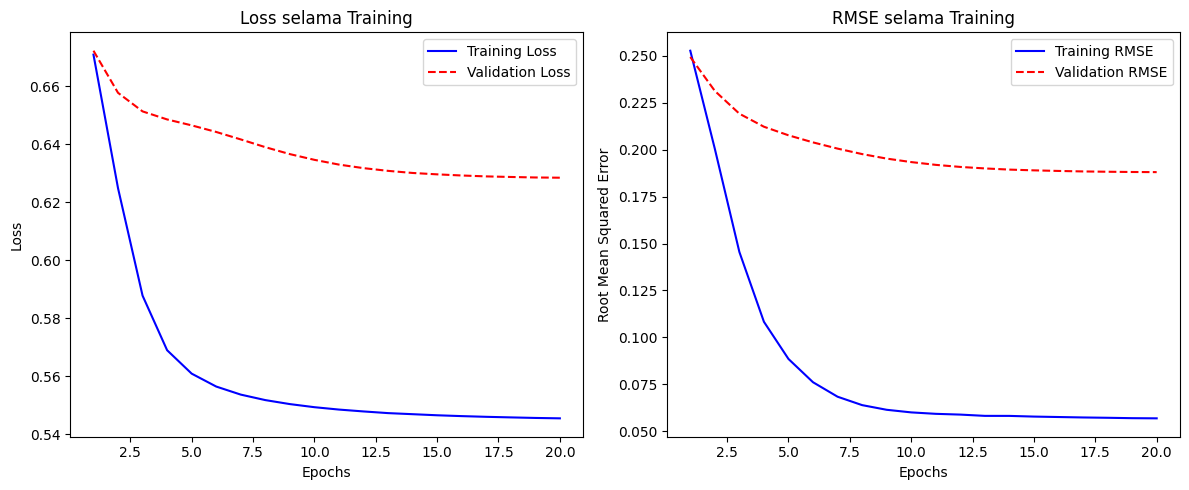

In [49]:
# Ambil data dari history
loss = history.history['loss']
val_loss = history.history['val_loss']
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

epochs = range(1, len(loss) + 1)

# Plot Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r--', label='Validation Loss')
plt.title('Loss selama Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot RMSE
plt.subplot(1, 2, 2)
plt.plot(epochs, rmse, 'b-', label='Training RMSE')
plt.plot(epochs, val_rmse, 'r--', label='Validation RMSE')
plt.title('RMSE selama Training')
plt.xlabel('Epochs')
plt.ylabel('Root Mean Squared Error')
plt.legend()

plt.tight_layout()
plt.show()

📊 Penjelasan Visualisasi

🔵 Kiri: Loss selama Training
- Garis biru (Training Loss): Menurun drastis, artinya model belajar dengan baik dari data training.
- Garis merah putus-putus (Validation Loss): Turun juga, tapi cenderung mulai stagnan atau melandai setelah epoch ke-10.

✅ Interpretasi:
- Tidak ada overfitting yang jelas, karena val_loss tidak naik tajam setelah beberapa epoch. Tapi terlihat model mulai mencapai titik optimal mendekati epoch ke-15 hingga ke-20.

🔵 Kanan: RMSE selama Training
- Training RMSE (biru): Turun drastis dan stabil mendekati 0.05 — sangat bagus.
- Validation RMSE (merah): Turun juga, tapi menurun lebih lambat daripada training RMSE, dan berhenti turun drastis setelah epoch ke-10–15.

✅ Interpretasi:
- Model mampu mempelajari pola dari data dan memprediksi dengan cukup baik pada data yang tidak dilatih (validation set). Tapi tetap ada gap antara RMSE training dan validation → indikasi sedikit overfitting ringan.

**Recommendation Books**

In [50]:
def denormalize_rating(rating, min_rating=min_rating, max_rating=max_rating):
    return rating * (max_rating - min_rating) + min_rating

Kode ini merupakan fungsi untuk mengubah rating dari skala normalisasi kembali ke skala aslinya.
- Saat training model, rating biasanya dinormalisasi ke rentang [0, 1] agar model lebih stabil.
- Fungsi ini mengembalikan (denormalisasi) nilai prediksi ke skala rating asli, misalnya 1–5.

In [ ]:
# Pilih user acak
random_user_id = np.random.randint(num_users)
print(f"🎲 User acak (encoded): {random_user_id}")

# Buat input untuk prediksi semua buku
user_input = np.array([[random_user_id, book_id] for book_id in range(num_books)])

🎲 User acak (encoded): 7821


Kode ini digunakan untuk memilih satu user secara acak dan mempersiapkan input prediksi untuk semua buku yang tersedia bagi user tersebut.

In [52]:
# Prediksi
pred_ratings = model.predict(user_input, verbose=0).flatten()
pred_ratings = denormalize_rating(pred_ratings)

Kode ini Menghasilkan array berisi prediksi rating asli (skala 1–5) dari semua buku, khusus untuk satu user.

In [55]:
# Buat DataFrame hasil
user_pred_df = pd.DataFrame({
    'book_encoded': range(num_books),
    'predicted_rating': pred_ratings
})

# Mapping encoded bookID ke bookID asli dan judul
book_id_map = cf_df[['bookID', 'book']].drop_duplicates().set_index('book')['bookID'].to_dict()
title_map = prep_df.set_index('bookID')['title'].to_dict()

user_pred_df['bookID'] = user_pred_df['book_encoded'].map(book_id_map)
user_pred_df['title'] = user_pred_df['bookID'].map(title_map)

# Ambil Top 1 rekomendasi untuk user acak
top1_random_user = user_pred_df.sort_values(by='predicted_rating', ascending=False).head(1)
top10_random_user = user_pred_df.sort_values(by='predicted_rating', ascending=False).head(10)

print(f"\n🌟 Top Highest Recommendation from User {random_user_id}:")
print("="*80)
print(top1_random_user[['title', 'predicted_rating']])
print("="*80)
print(f"\n🌟 Top 10 Books Recommendation from User {random_user_id}:")
print(top10_random_user[['title', 'predicted_rating']])


🌟 Top Highest Recommendation from User 7821:
                                                  title  predicted_rating
1243  Middlesex Borough (Images of America: New Jersey)           4.80842

🌟 Top 10 Books Recommendation from User 7821:
                                                  title  predicted_rating
1243  Middlesex Borough (Images of America: New Jersey)          4.808420
4373                             Existential Meditation          4.803359
855   Literature Circle Guide: Bridge to Terabithia:...          4.791355
4     Harry Potter Boxed Set  Books 1-5 (Harry Potte...          4.789571
624   Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...          4.780899
5474  The Goon Show  Volume 4: My Knees Have Fallen ...          4.773990
8544       Fanning the Flame: Bible  Cross  and Mission          4.760228
786                   Willem de Kooning: Late Paintings          4.738962
6587                     The Complete Calvin and Hobbes          4.731243
5023  The Complete 

Kode ini memfilter rekomendasi terbaik untuk seorang user yang dipilih secara acak, lalu mengonversi hasil prediksi model ke bentuk yang dapat dipahami manusia (judul buku + skor prediksi), dan menampilkannya.